In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/Loan status.csv')

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**Data Preprocessing**

In [6]:
# checking for null values
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [7]:
df.shape

(614, 13)

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
df.Gender.value_counts()

,count
Gender,
Male,489
Female,112


In [10]:
df['Gender'] = df['Gender'].replace(np.nan,'Male')

In [11]:
df.Married.value_counts()

,count
Married,
Yes,398
No,213


In [12]:
df['Married'] = df['Married'].replace(np.nan,'Yes')

In [13]:
df.Self_Employed.value_counts()

,count
Self_Employed,
No,500
Yes,82


In [14]:
df['Self_Employed'] = df['Self_Employed'].replace(np.nan,'No')

In [15]:
df.Dependents.value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


In [16]:
#Replacing 3+ to 4
df['Dependents'] = df['Dependents'].replace('3+',4)


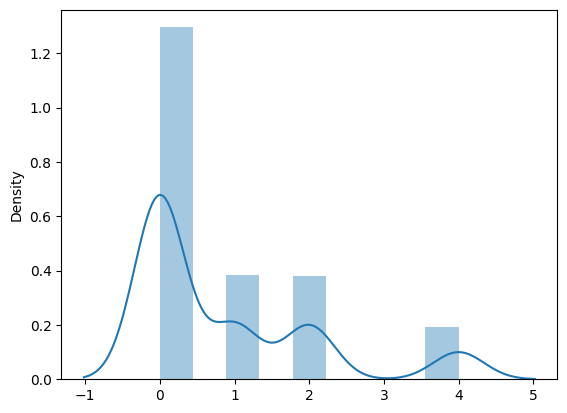

In [17]:
sns.distplot( x= df.Dependents)
plt.show()

In [18]:
df['Dependents'] = df['Dependents'].replace(np.nan, 0)

In [19]:
df['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

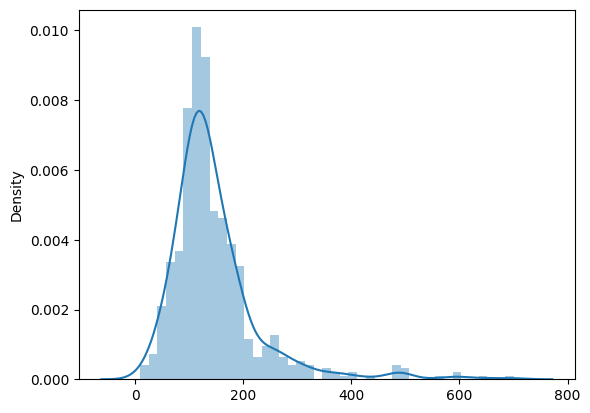

In [20]:
sns.distplot( x= df['LoanAmount'])
plt.show()

In [21]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median()).astype(int)

In [22]:
df['Loan_Amount_Term'].value_counts()

,count
Loan_Amount_Term,
360.0,512
180.0,44
480.0,15
300.0,13
84.0,4
240.0,4
120.0,3
60.0,2
36.0,2


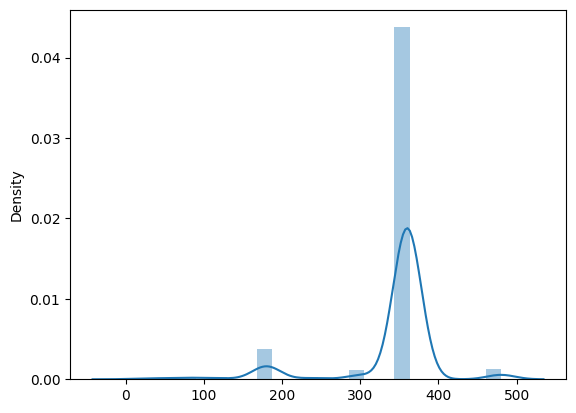

In [23]:
sns.distplot( x= df['Loan_Amount_Term'])
plt.show()

In [24]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median()).astype(int)

In [25]:
df['Credit_History'].value_counts()

,count
Credit_History,
1.0,475
0.0,89


In [26]:
df['Credit_History'] = df['Credit_History'].replace(np.nan, 1.0).astype(int)

In [27]:
df['CoapplicantIncome'] = df['CoapplicantIncome'].astype(int)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Loan_ID            614 non-null    object
 1   Gender             614 non-null    object
 2   Married            614 non-null    object
 3   Dependents         614 non-null    object
 4   Education          614 non-null    object
 5   Self_Employed      614 non-null    object
 6   ApplicantIncome    614 non-null    int64 
 7   CoapplicantIncome  614 non-null    int64 
 8   LoanAmount         614 non-null    int64 
 9   Loan_Amount_Term   614 non-null    int64 
 10  Credit_History     614 non-null    int64 
 11  Property_Area      614 non-null    object
 12  Loan_Status        614 non-null    object
dtypes: int64(5), object(8)
memory usage: 62.5+ KB


In [29]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,128,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y


**Exploratory Data Analysis**

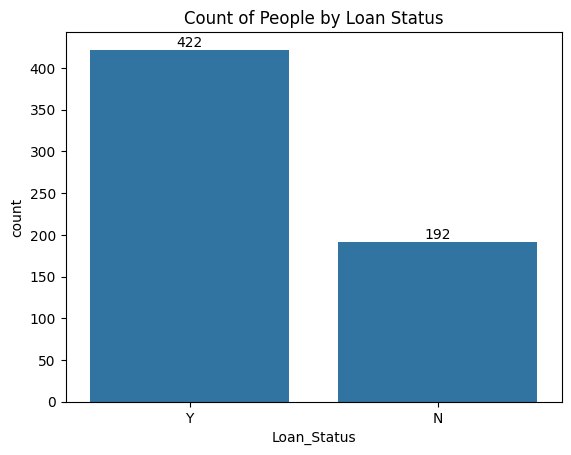

In [41]:
ax = sns.countplot(x = 'Loan_Status', data = df)
ax.bar_label(ax.containers[0])
plt.title('Count of People by Loan Status')
plt.show()

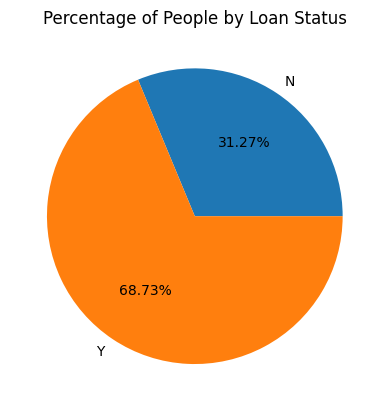

From the given pie chart we can conclude that 31.27% of People loan rejected


In [31]:
gb = df.groupby('Loan_Status').agg({'Loan_Status':'count'})
plt.pie(gb['Loan_Status'], labels=gb.index, autopct='%1.2f%%')
plt.title('Percentage of People by Loan Status')
plt.show()

print('From the given pie chart we can conclude that 31.27% of People loan rejected')

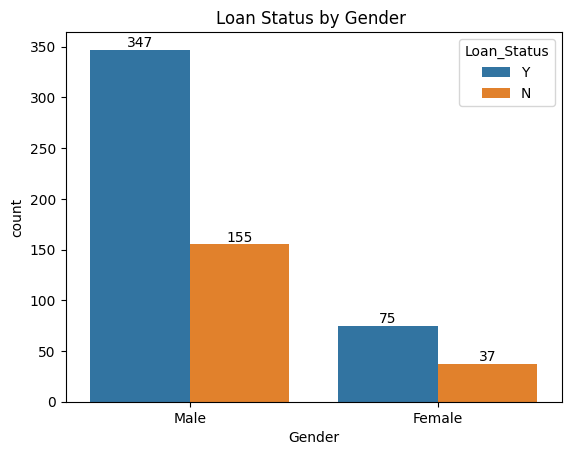

In [32]:
ax = sns.countplot(x = "Gender", data = df, hue='Loan_Status')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Loan Status by Gender ')
plt.show()

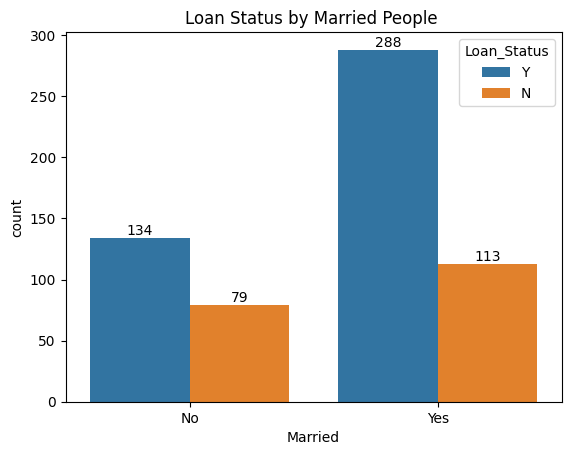

In [33]:
ax = sns.countplot(x = "Married", data = df, hue='Loan_Status')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Loan Status by Married People ')
plt.show()

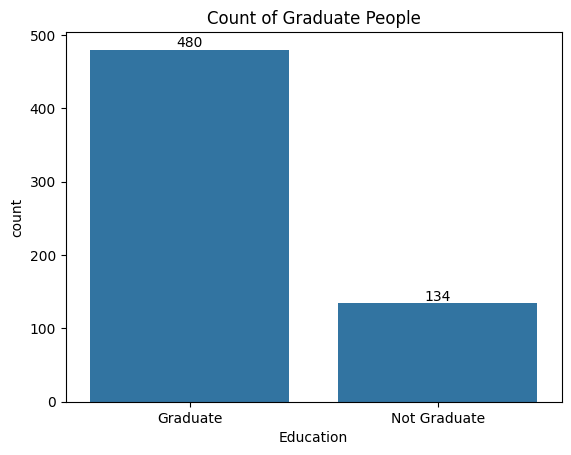

In [34]:
ax = sns.countplot(x = "Education", data = df)
ax.bar_label(ax.containers[0])
plt.title('Count of Graduate People')
plt.show()

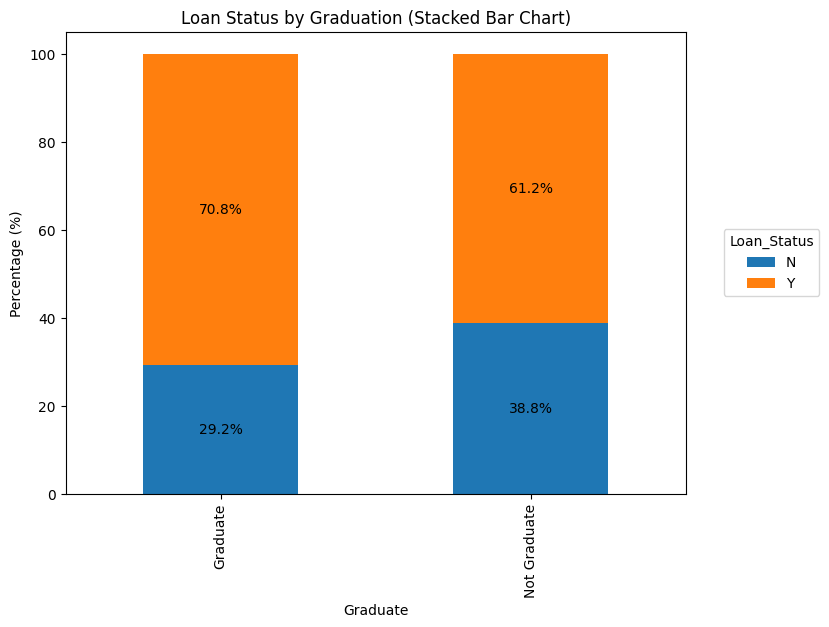

A higher percentage of graduates have their loans approved compared to non-graduates.


In [35]:
total_counts = df.groupby('Education')['Loan_Status'].value_counts(normalize=True).unstack() * 100
fig, ax = plt.subplots(figsize=(8,6))
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4','#ff7f0e'])

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center', fontsize=10)

plt.title('Loan Status by Graduation (Stacked Bar Chart)')
plt.ylabel('Percentage (%)')
plt.xlabel('Graduate')
plt.legend(title="Loan_Status", bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.show()

print('A higher percentage of graduates have their loans approved compared to non-graduates.')

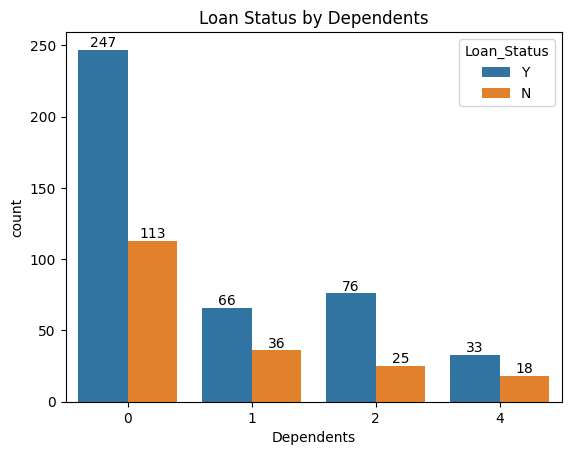

The majority of loan approvals are granted to applicants with no dependents.


In [36]:
ax = sns.countplot(x = "Dependents", data = df, hue="Loan_Status")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Loan Status by Dependents')
plt.show()

print("The majority of loan approvals are granted to applicants with no dependents.")

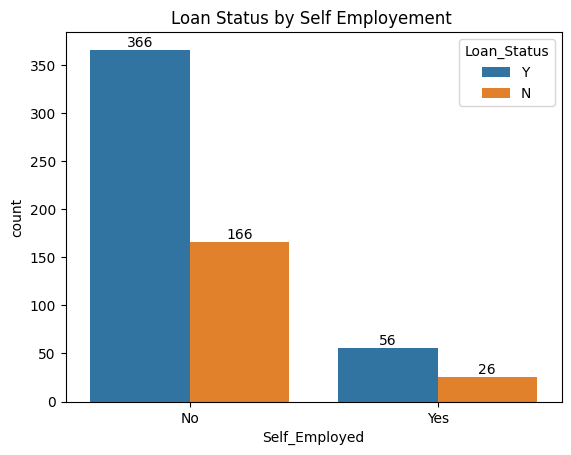

The majority of loan approvals are granted to applicants who are not self employed


In [37]:
ax = sns.countplot(x = "Self_Employed", data = df, hue='Loan_Status')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Loan Status by Self Employement ')
plt.show()

print("The majority of loan approvals are granted to applicants who are not self employed")

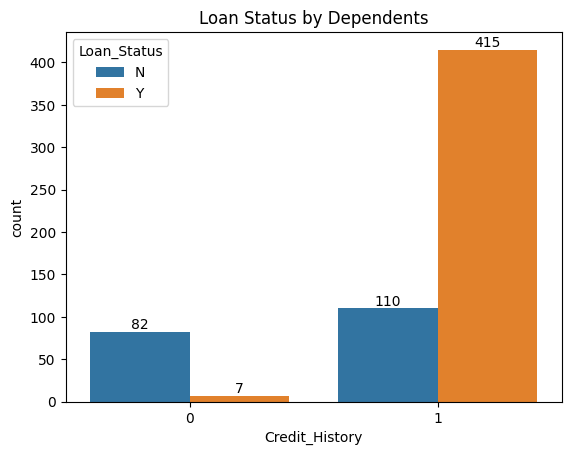

The majority of loan approvals are granted to applicants with a strong repayment history


In [38]:
ax = sns.countplot(x = "Credit_History", data = df, hue="Loan_Status")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Loan Status by Dependents')
plt.show()

print('The majority of loan approvals are granted to applicants with a strong repayment history')


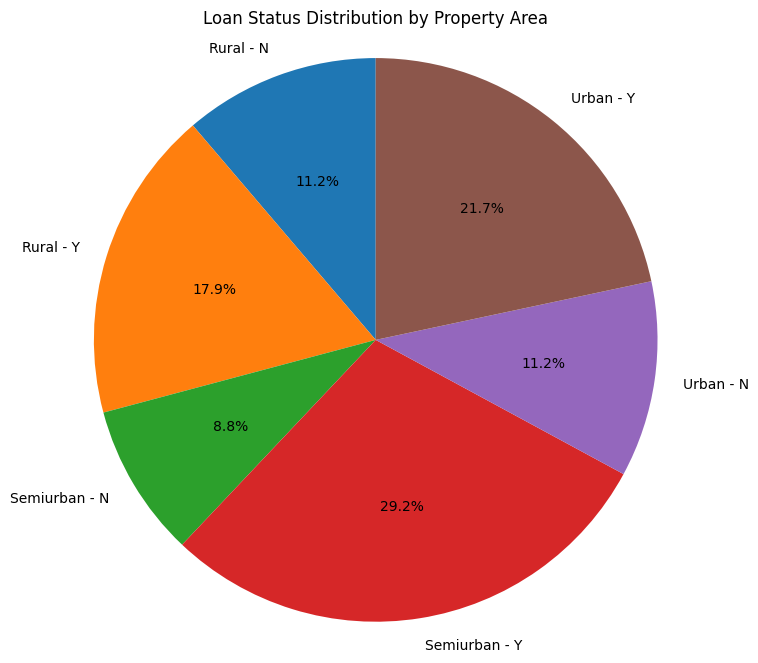

The majority of loan approvals are granted to Semiurban Area


In [39]:
grouped_data = df.groupby(['Property_Area', 'Loan_Status']).size().reset_index(name='Count')

# Create a 'Category' column combining 'Property_Area' and 'Loan_Status'
grouped_data['Category'] = grouped_data['Property_Area'] + ' - ' + grouped_data['Loan_Status']

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(grouped_data['Count'], labels=grouped_data['Category'], autopct='%1.1f%%', startangle=90)
plt.title('Loan Status Distribution by Property Area')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

print("The majority of loan approvals are granted to Semiurban Area")

**Machine** **Learning**

In [57]:
#Label Encoding
#convert categorical columns to numerical values
df.replace({'Married':{'No':0,'Yes':1},'Education':{'Graduate':1,'Not Graduate':0},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1, 'Urban':2},"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [58]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0,128,360,1,2,1
1,LP001003,1,1,1,1,0,4583,1508,128,360,1,0,0
2,LP001005,1,1,0,1,1,3000,0,66,360,1,2,1
3,LP001006,1,1,0,0,0,2583,2358,120,360,1,2,1
4,LP001008,1,0,0,1,0,6000,0,141,360,1,2,1


In [59]:
# importing required libraries
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [60]:
# seprating the data and label
X = df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = df['Loan_Status']

In [61]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0          0          1              0             5849   
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [62]:
#Train Test Split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [63]:
print(X.shape, X_train.shape, X_test.shape)

(614, 11) (552, 11) (62, 11)


In [64]:
# Support vector machine model
classifier = svm.SVC(kernel='linear')

In [65]:
#Training the support vector Machine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model evaluation

In [66]:
# accuracy score on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [67]:
print('Accuracy on training data : ', training_data_accuracy)

Accuracy on training data :  0.8097826086956522


In [68]:
# accuracy score on test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [69]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.7903225806451613


Predictive System

In [78]:
input = [1,0,0,1,0,6000,0,141,360,1,2]

input_reshaped = np.asarray(input)

input_reshaped_data = input_reshaped.reshape(1,-1)

predictions = classifier.predict(input_reshaped_data)
print(predictions)

if (predictions[0]==0):
  print('Loan is not Approved')
else:
  print('Loan is Approved')

[1]
Loan is Approved
